In [1]:
import csv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [5, 5]

In [2]:
def draw_point(x, y, color, size=20):
    plt.scatter(x, y, size, color)

In [3]:
import numpy as np

In [4]:
def generateMinMax(dataset_name, skipLines):
    mins = []
    maxs = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if (csvReader.line_num - 1) not in skipLines:
                if mins == []:
                    for i in range(len(row)):
                        mins.append(float(row[i]))
                        maxs.append(float(row[i]))
                else:
                    for i in range(len(row)):
                        mins[i] = min(mins[i], float(row[i]))
                        maxs[i] = max(maxs[i], float(row[i]))
    return (mins, maxs)

In [5]:
def distance(x, y):
        return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) ** (0.5)

In [6]:
def read_points(dataset_name):
    points = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                points.append([float(row[0]), float(row[1])])
    return points

In [7]:
def DBSCAN(dataset_name, epsilon, m):
    lonely = []
    colors = ['hotpink', 'lime', 'slateblue', 'orangered', 'indigo']
    colorPoints = {'hotpink' : [], 'lime' : [], 'slateblue' : [], 'orangered' : [], 'indigo' : []}
    points = read_points(dataset_name)
    
    def doIteration():
        def getNeighbours(v_point):
            neighbours = []
            for point in points:
                if distance(point, v_point) < epsilon:
                    neighbours.append(point)
            if len(neighbours) < m:
                return []
            return neighbours
                    
    
        start_point = np.random.randint(len(points))
        neighbours = getNeighbours(points[start_point])
        
        if len(neighbours) == 0:
            lonely.append(points[start_point])
            del points[start_point]
            return []
        
        group = [points[start_point]]
        del points[start_point]
        while len(neighbours) > 0:
            neighbour = neighbours[0]
            group.append(neighbour)
            del neighbours[0]
            if neighbour in lonely:
                lonely.remove(neighbour)
            else:
                n_neighbours = getNeighbours(neighbour)
                if not n_neighbours == []:
                    neighbours += n_neighbours
                    for n in n_neighbours:
                        points.remove(n)
        return group
    
    for point in points:
        draw_point(point[0], point[1], 'grey')
    
    color = 0
    while len(points) > 0:
        group = doIteration()
        if not group == []:
            for point in group:
                draw_point(point[0], point[1], colors[color])
            color += 1
    return color

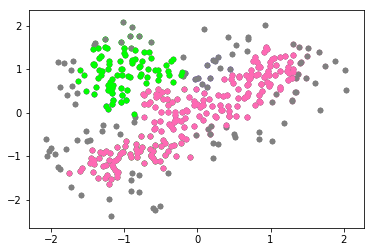

In [15]:
m = 9
epsilon = 0.3666666666666667
x = 0
try:
    x = DBSCAN('datasets/blobs.csv', epsilon, m)
except:
    pass
while not x == 2:
    try:
        x = DBSCAN('datasets/blobs.csv', epsilon, m)
    except:
        pass
plt.show()

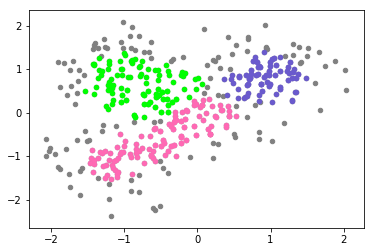

In [14]:
m = 16
epsilon = 0.419191919119191
x = 0
try:
    x = DBSCAN('datasets/blobs.csv', epsilon, m)
except:
    pass
while not x == 3:
    try:
        x = DBSCAN('datasets/blobs.csv', epsilon, m)
    except:
        pass
plt.show()

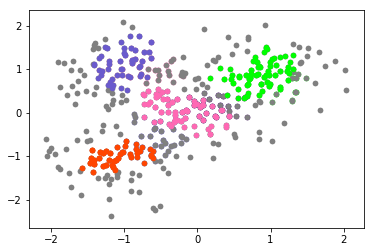

In [11]:
m = 15
epsilon = 0.368686868686868687
x = 0
try:
    x = DBSCAN('datasets/blobs.csv', epsilon, m)
except:
    pass
while not x == 4:
    try:
        x = DBSCAN('datasets/blobs.csv', epsilon, m)
    except:
        pass
plt.show()

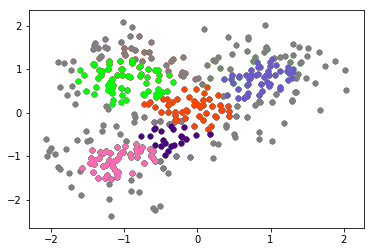

In [12]:
m = 16
epsilon = 0.374747474747474747
x = 0
try:
    x = DBSCAN('datasets/blobs.csv', epsilon, m)
except:
    pass
while not x == 5:
    try:
        x = DBSCAN('datasets/blobs.csv', epsilon, m)
    except:
        pass
plt.show()